# **Iris Flowers Classification ML Project** 



Data_Set Link :https://www.canva.com/link?target=http%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fdatasets%2FIris&design=DAEjrwWV35w

In [1]:
#importing the library 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [2]:
#import ipython of better visulization using multiple option:
#widget option will provide the multiple
import ipywidgets  as widgets
from IPython.display import display

style = {'description_width': 'initial'}

In [3]:
#reading the csv file using the dataset link and visulisation the columns and row
df =pd.read_csv("/content/iris.csv");
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#info function used to get meta of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#describe function describe the statistical values
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#colums :attribute of dataframe return colums
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
#shape : attribute of dataframe return size (nxm)
print("Size of dataframe :",df.shape)
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Size of dataframe : (150, 5)
Dataset has 150 rows and 5 columns.


In [8]:
#isnull check null present in data or not 
## False means no null values found 
## True means null values found
df.isnull().value_counts()

sepal_length  sepal_width  petal_length  petal_width  species
False         False        False         False        False      150
dtype: int64

In [9]:
## or directly use isnull().countfunction will return count of not null values
#count of false
df.isnull().count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

# EDA

In [10]:
#craeting a drop down box which will show diff option for ploting only by changing the options
wid_get =widgets.Dropdown(
    options =[col for col in df.columns.to_list() if col.startswith(('sepal','petal'))],
    description ="Choose the Chart Plot vs Attributes",
    disabled=False,
    layout=widgets.Layout(width="40%",height="40px"),
    style=style)

Dropdown(description='Choose the Chart Plot vs Attributes', layout=Layout(height='40px', width='40%'), options…

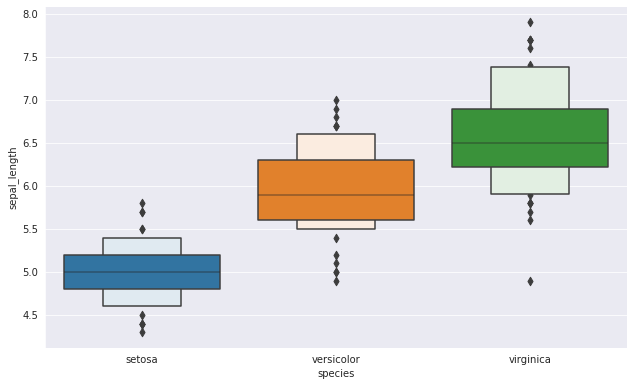

In [11]:
#displaying the cat plot using seaborn for #outlier as well data distribution
display(wid_get)
sns.catplot(x='species',y=wid_get.value,kind ='boxen',data=df,height=5.27,aspect=8.7/5.27)

Dropdown(description='Choose the Chart Plot vs Attributes', layout=Layout(height='40px', width='40%'), options…

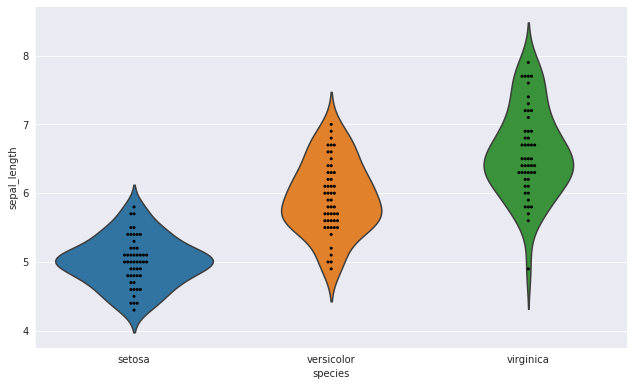

In [12]:
pram = sns.catplot(x="species", y=wid_get.value, kind="violin", inner=None, data=df, height=5.27, aspect=8.7/5.27)
sns.swarmplot(x="species", y=wid_get.value, color="k", size=3, data=df, ax=pram.ax);
display(wid_get)

Dropdown(description='Choose the Chart Plot vs Attributes', layout=Layout(height='40px', width='40%'), options…

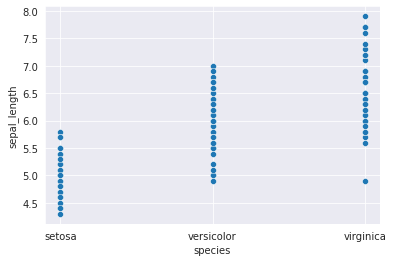

In [13]:
display(wid_get)
sns.scatterplot(x="species", y=wid_get.value, data=df);

Text(0.5, 0, 'Species')

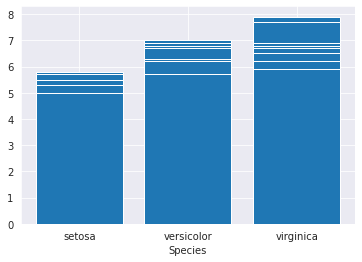

In [14]:
#barplot
plt.bar(df['species'], df['sepal_length'])
plt.xlabel('Species')

Text(0.5, 0, 'Species')

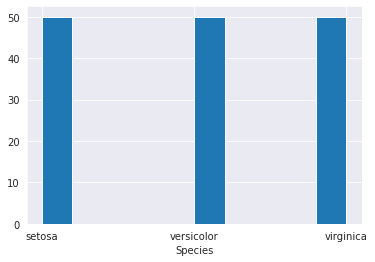

In [15]:
#Histogram
plt.hist(df['species'])
plt.xlabel('Species')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


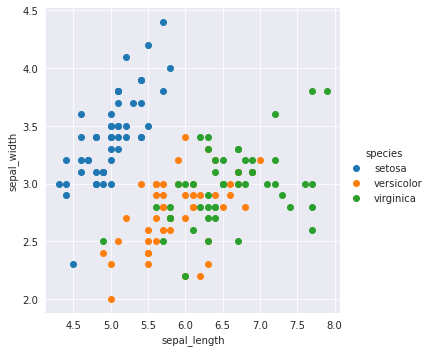

In [16]:
#sns facegrid
sns.FacetGrid(df,hue="species",size=5).map(plt.scatter,"sepal_length","sepal_width").add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


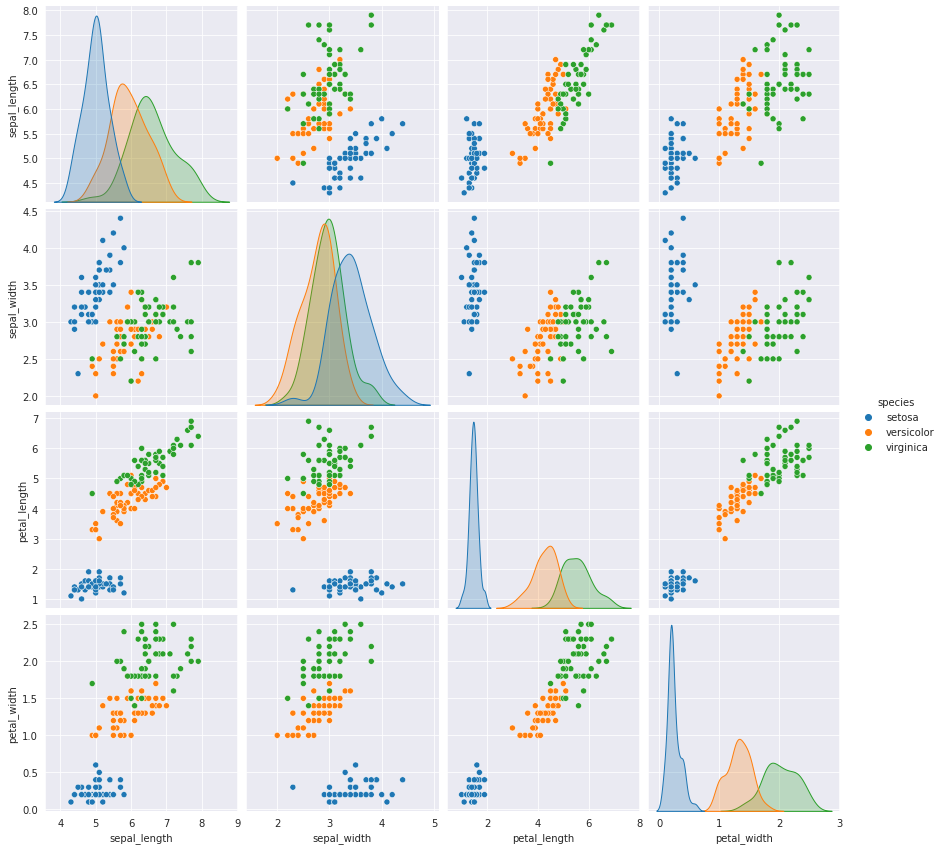

In [17]:
sns.pairplot(df,hue="species",size=3)

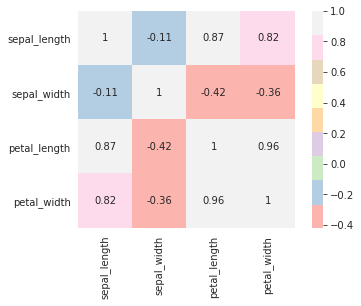

In [18]:
#corelation heat-map
sns.heatmap(df.corr(),square=True,annot=True,cmap='Pastel1')

# Split of data --- Traning --- Testing 

In [19]:
## maping the speices with :
## setosa --> 0
## versicolor --->1
## virginica --->2

df['species'] = df['species'].map({'setosa':0,'versicolor':1,'virginica':2}).astype(int)

In [20]:
#splitting the independent and dependent variable
##X--> indepndent  (label)
##y---> dependent (taget)
X =df.iloc[:,:-1] 
y =df.iloc[:,-1]

In [21]:
#check the shape and of X and y
print("Shape_dependent :",X.shape);
print("Shape_independet :",y.shape)

Shape_dependent : (150, 4)
Shape_independet : (150,)


In [22]:
#chceking data is balance or not.
y.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [23]:
#importing labraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import  Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
#train - test split 
X_train,X_test ,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=28)

In [25]:
#check the shapes 
print("Shape_X_train :",X_train.shape)
print("Shape_X_test :",X_test.shape)
print("Shape_y_train :",y_train.shape)
print("Shape_y_test :",y_test.shape)

Shape_X_train : (105, 4)
Shape_X_test : (45, 4)
Shape_y_train : (105,)
Shape_y_test : (45,)


In [26]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression())])
pipe_SVC=Pipeline([('scaler2',StandardScaler()),
                    ('SVR',SVC())])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler5',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])

In [27]:
##pipleline list
pipeline1=[pipe_LR,pipe_SVC,pipe_DT,pipe_RF,pipe_Knn]

In [28]:
#pipeline_dict
pipe_dict={0:'LogisticRegression',1:'KNeighborsClassifier',2:'SVC',3:'DecisionTreeClassifier',4:'RandomForestClassifier'}

In [29]:
#fit the data with model
for pipe in pipeline1:
  pipe.fit(X_train,y_train)

In [30]:
for i,models in enumerate(pipeline1):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_test,y_test)))

LogisticRegression Accuracy : 0.9333333333333333
KNeighborsClassifier Accuracy : 0.9555555555555556
SVC Accuracy : 0.9333333333333333
DecisionTreeClassifier Accuracy : 0.9333333333333333
RandomForestClassifier Accuracy : 0.9555555555555556


In [31]:
#the highest is coming with knn and random_forest 
#let try to check knn
error_rate=[]
for i in range(1,40):
  model_Knn=KNeighborsClassifier(n_neighbors=i)
  model_Knn.fit(X_train,y_train)
  pred_i=model_Knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

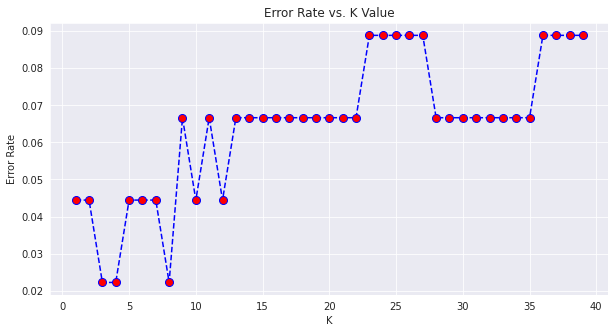

In [32]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Tuning_KNN

In [33]:
#since the error is low at 5 so we will use 8 neighbours which have very low error
model_knn =KNeighborsClassifier(n_neighbors=8)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [34]:
y_pred =model_knn.predict(X_test)

In [35]:
y_pred

array([0, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 0,
       1, 1, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [36]:
print(y_test)

24     0
134    2
81     1
14     0
114    2
93     1
128    2
66     1
59     1
35     0
101    2
15     0
50     1
51     1
130    2
48     0
120    2
124    2
147    2
62     1
0      0
36     0
53     1
70     1
73     1
49     0
105    2
136    2
9      0
52     1
21     0
144    2
92     1
27     0
77     1
75     1
103    2
56     1
64     1
132    2
61     1
99     1
121    2
54     1
13     0
Name: species, dtype: int64


In [37]:
#importing metrics 
from sklearn import metrics

# Results

In [38]:
print("Accuracy_score :",metrics.accuracy_score(y_test,y_pred))
print("Classification report \n",metrics.classification_report(y_test,y_pred))
print("Confusion_metrics\n:",metrics.confusion_matrix(y_test,y_pred))

Accuracy_score : 0.9777777777777777
Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.95      0.97        19
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion_metrics
: [[12  0  0]
 [ 0 18  1]
 [ 0  0 14]]
